# LIVER DISEASE PREDICTION

This data set contains **416 liver patient** records and **167 non liver patient** records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records.

Any patient whose age exceeded 89 is listed as being of age "90".

**Columns:**

   - Age of the patient
   - Gender of the patient
   - Total Bilirubin
   - Direct Bilirubin
   - Alkaline Phosphotase
   - Alamine Aminotransferase
   - Aspartate Aminotransferase
   - Total Protiens
   - Albumin
   - Albumin and Globulin Ratio
   
Dataset: field used to split the data into two sets (patient with liver disease, or no disease)

In [112]:
# Importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [113]:
df=pd.read_csv("indian_liver_patient.csv")
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [115]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [116]:
# Shape of dataset:
df.shape

(583, 11)

In [117]:
# Cheaking Missing (NaN) Values:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

'Albumin_and_Globulin_Ratio' feature contain 4 NaN values.

In [118]:
# Mean & Median of "Albumin_and_Globulin_Ratio" feature:
print(df['Albumin_and_Globulin_Ratio'].median())
print(df['Albumin_and_Globulin_Ratio'].mean())

0.93
0.9470639032815197


In [119]:
# Filling NaN Values of "Albumin_and_Globulin_Ratio" feature with Median 
df['Albumin_and_Globulin_Ratio']= df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].median())

In [120]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [121]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.946947,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318495,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [123]:
df['Dataset'].value_counts()

1    416
2    167
Name: Dataset, dtype: int64

BAR PLOT

Liver Disease Patients      : 416
Non Liver Disease Patients  : 167


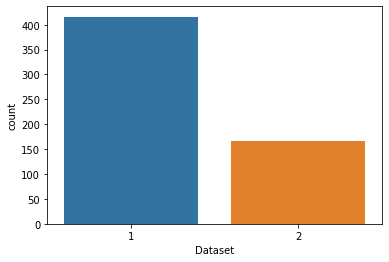

In [124]:
# Target feature:
print("Liver Disease Patients      :", df['Dataset'].value_counts()[1])
print("Non Liver Disease Patients  :", df['Dataset'].value_counts()[2])

# Visualization:
sns.countplot(df['Dataset'])
plt.show()

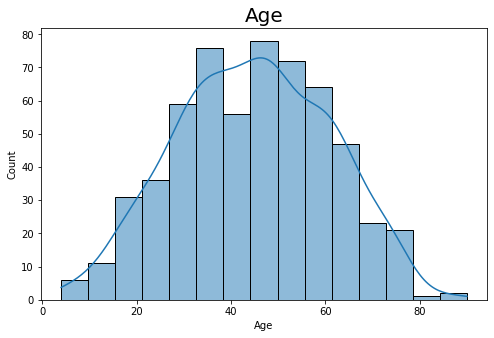

In [126]:
# Histogram of Age:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], kde=True)
plt.title('Age', fontsize=20)
plt.show()

In [127]:
# Printing How many Unique values present in each feature: 
for feature in df.columns:
    print(feature,":", len(df[feature].unique()))


Age : 72
Gender : 2
Total_Bilirubin : 113
Direct_Bilirubin : 80
Alkaline_Phosphotase : 263
Alamine_Aminotransferase : 152
Aspartate_Aminotransferase : 177
Total_Protiens : 58
Albumin : 40
Albumin_and_Globulin_Ratio : 69
Dataset : 2


Total Male   : 441
Total Female : 142


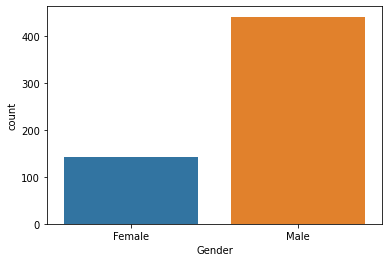

In [128]:
# Gender feature:
print("Total Male   :", df['Gender'].value_counts()[0])
print("Total Female :", df['Gender'].value_counts()[1])

# Visualization:
sns.countplot(df['Gender'])
plt.show()

In [129]:
# Label Encoding
df['Gender'] = np.where(df['Gender']=='Male', 1,0)

In [130]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


Correlations

Finally, let's take a look at the relationships between numeric features and other numeric features.

Correlation is a value between -1 and 1 that represents how closely values for two separate features move in unison.

Positive correlation means that as one feature increases, the other increases; eg. a child's age and her height.

Negative correlation means that as one feature increases, the other decreases; eg. hours spent studying and number of parties attended.

Correlations near -1 or 1 indicate a strong relationship.

Those closer to 0 indicate a weak relationship.

0 indicates no relationship.

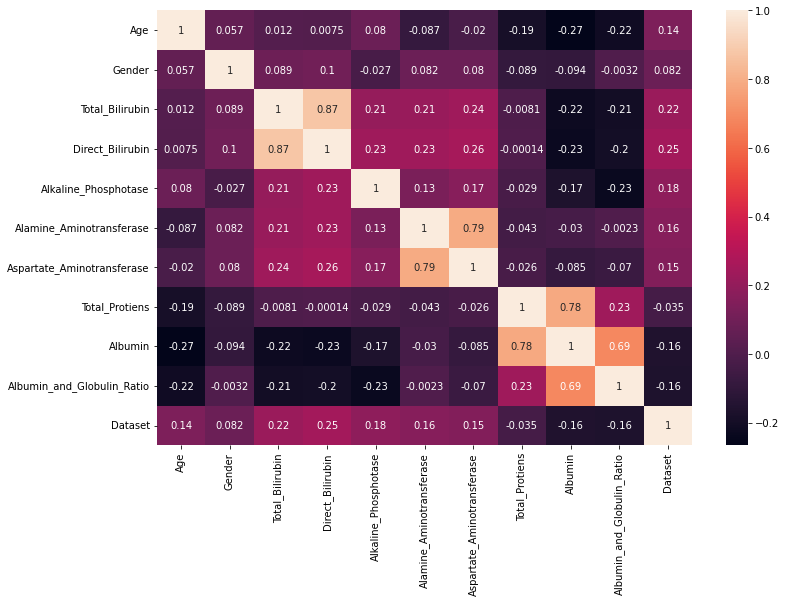

In [131]:
# Correlation using Heatmap:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [132]:
#There is Multi-Collinearity found on our dataset.
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

- Multicollinearity between 'Total_Bilirubin' and 'Direct_Bilirubin' is 0.87% 
- Multicollinearity between 'Alamine_Aminotransferase' and 'Aspartate_Aminotransferase' is 0.79%
- Multicollinearity between 'Total_Protiens' and 'Albumin' is 0.78%
- Multicollinearity between 'Albumin' and 'Albumin_and_Globulin_Ratio' is 0.69%

Usually we drop that feature which has above 0.85% multicollinearity between two independent feature. Here we have only 'Total_Bilirubin' and 'Direct_Bilirubin' feature which has 0.87% mutlicollinearity. So we drop one of the feature from them and other independent feature has less multicollinearity, less than 0.80% So we keep that feature.

In [133]:
# Droping 'Direct_Bilirubin' feature:
df = df.drop('Direct_Bilirubin', axis=1)

In [134]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

HISTPLOT

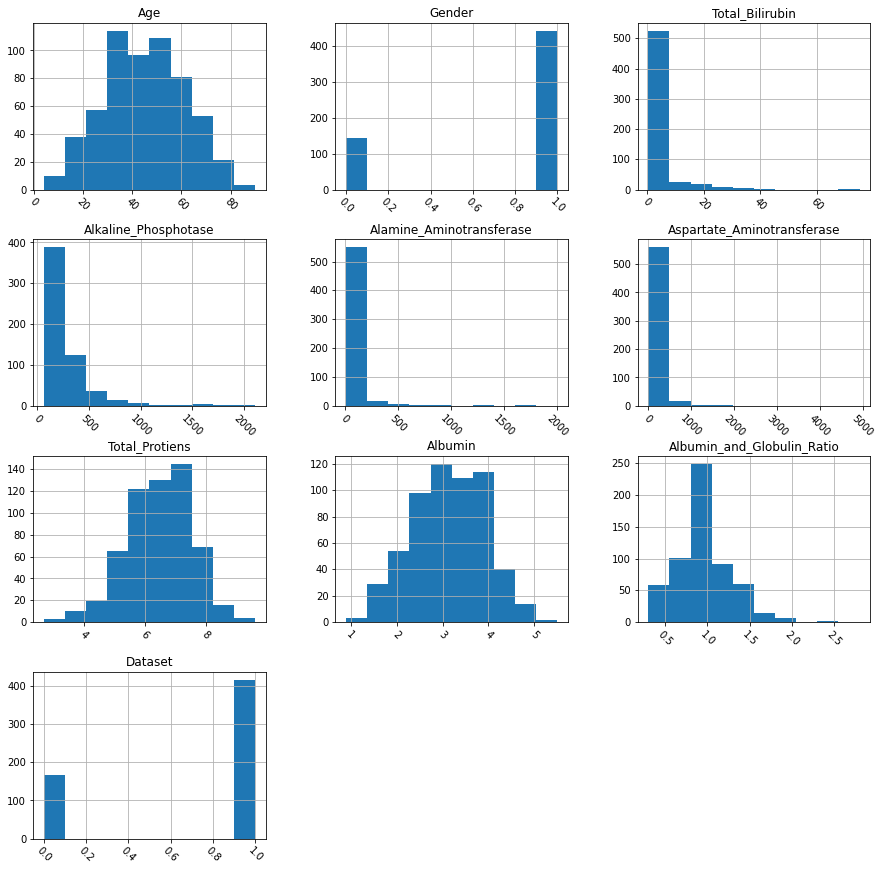

In [135]:
# Plot histogram grid
df.hist(figsize=(15,15), xrot=-45, bins=10) ## Display the labels rotated by 45 degress

# Clear the text "residue"
plt.show()

DISTPLOT

<AxesSubplot:xlabel='Albumin', ylabel='Density'>

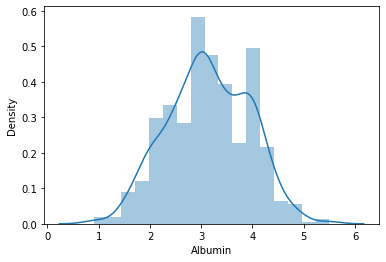

In [136]:
sns.distplot(df['Albumin'])

<AxesSubplot:xlabel='Total_Protiens', ylabel='Density'>

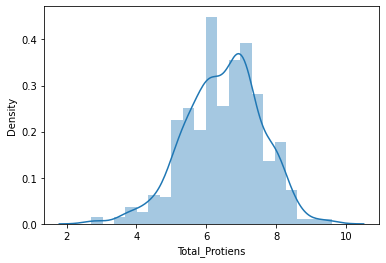

In [137]:
sns.distplot(df['Total_Protiens'])

In [138]:
# Calculate the boundaries of Total_Protiens feature which differentiates the outliers:
uppper_boundary=df['Total_Protiens'].mean() + 3* df['Total_Protiens'].std()
lower_boundary=df['Total_Protiens'].mean() - 3* df['Total_Protiens'].std()

print(df['Total_Protiens'].mean())
print(lower_boundary)
print(uppper_boundary)

6.483190394511149
3.2268359424407516
9.739544846581545


In [139]:
#Calculate the boundaries of Albumin feature which differentiates the outliers:
uppper_boundary=df['Albumin'].mean() + 3* df['Albumin'].std()
lower_boundary=df['Albumin'].mean() - 3* df['Albumin'].std()

print(df['Albumin'].mean())
print(lower_boundary)
print(uppper_boundary)

3.141852487135506
0.7552960692434296
5.528408905027582


In [140]:
# Lets compute the Interquantile range of Total_Bilirubin feature to calculate the boundaries:
IQR = df.Total_Bilirubin.quantile(0.75)-df.Total_Bilirubin.quantile(0.25)

# Extreme outliers
lower_bridge = df['Total_Bilirubin'].quantile(0.25) - (IQR*3)
upper_bridge = df['Total_Bilirubin'].quantile(0.75) + (IQR*3)

print(lower_bridge)
print(upper_bridge)

# if value greater than upper bridge, we replace that value with upper_bridge value:
df.loc[df['Total_Bilirubin'] >= upper_bridge, 'Total_Bilirubin'] = upper_bridge

-4.6000000000000005
8.0


In [141]:
# Lets compute the Interquantile range of Alkaline_Phosphotase feature to calculate the boundaries:
IQR = df.Alkaline_Phosphotase.quantile(0.75) - df.Alkaline_Phosphotase.quantile(0.25)

# Extreme outliers
lower_bridge = df['Alkaline_Phosphotase'].quantile(0.25) - (IQR*3)
upper_bridge = df['Alkaline_Phosphotase'].quantile(0.75) + (IQR*3)

print(lower_bridge)
print(upper_bridge)

# if value greater than upper bridge, we replace that value with upper_bridge value:
df.loc[df['Alkaline_Phosphotase'] >= upper_bridge, 'Alkaline_Phosphotase'] = upper_bridge

-192.0
665.5


In [143]:
# Lets compute the Interquantile range of Alamine_Aminotransferase feature to calculate the boundaries:
IQR = df.Alamine_Aminotransferase.quantile(0.75) - df.Alamine_Aminotransferase.quantile(0.25)

# Extreme outliers
lower_bridge = df['Alamine_Aminotransferase'].quantile(0.25) - (IQR*3)
upper_bridge = df['Alamine_Aminotransferase'].quantile(0.75) + (IQR*3)

print(lower_bridge)
print(upper_bridge)

# if value greater than upper bridge, we replace that value with upper_bridge value:
df.loc[df['Alamine_Aminotransferase'] >= upper_bridge, 'Alamine_Aminotransferase'] = upper_bridge

-89.5
173.0


In [144]:
# Lets compute the Interquantile range of Aspartate_Aminotransferase feature to calculate the boundaries:
IQR = df.Aspartate_Aminotransferase.quantile(0.75) - df.Aspartate_Aminotransferase.quantile(0.25)

# Extreme outliers
lower_bridge = df['Aspartate_Aminotransferase'].quantile(0.25) - (IQR*3)
upper_bridge = df['Aspartate_Aminotransferase'].quantile(0.75) + (IQR*3)

print(lower_bridge)
print(upper_bridge)

# if value greater than upper bridge, we replace that value with upper_bridge value:
df.loc[df['Aspartate_Aminotransferase'] >= upper_bridge, 'Aspartate_Aminotransferase'] = upper_bridge

-161.0
273.0


In [36]:
# Lets compute the Interquantile range of Albumin_and_Globulin_Ratio feature to calculate the boundaries
IQR = df.Albumin_and_Globulin_Ratio.quantile(0.75) - df.Albumin_and_Globulin_Ratio.quantile(0.25)

# Extreme outliers
lower_bridge = df['Albumin_and_Globulin_Ratio'].quantile(0.25) - (IQR*3)
upper_bridge = df['Albumin_and_Globulin_Ratio'].quantile(0.75) + (IQR*3)

print(lower_bridge)
print(upper_bridge)

# if value greater than upper bridge, we replace that value with upper_bridge value:
df.loc[df['Albumin_and_Globulin_Ratio'] >= upper_bridge, 'Albumin_and_Globulin_Ratio'] = upper_bridge

-0.5000000000000004
2.3000000000000007


In [145]:
df.describe()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,0.756432,2.249400,266.389365,53.399657,73.041166,6.483190,3.141852,0.946947,0.713551
std,16.189833,0.429603,2.382344,145.665460,46.059536,73.549864,1.085451,0.795519,0.318495,0.452490
min,4.000000,0.000000,0.400000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,1.000000,0.800000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,1.000000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,1.000000,2.600000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,8.000000,665.500000,173.000000,273.000000,9.600000,5.500000,2.800000,1.000000


In [146]:
# Independent and Dependent Feature:
y=df['Dataset'].copy()
X=df.drop('Dataset', axis=1).copy()
X

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0,0.7,187.0,16,18,6.8,3.3,0.90
1,62,1,8.0,665.5,64,100,7.5,3.2,0.74
2,62,1,7.3,490.0,60,68,7.0,3.3,0.89
3,58,1,1.0,182.0,14,20,6.8,3.4,1.00
4,72,1,3.9,195.0,27,59,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,500.0,20,34,5.9,1.6,0.37
579,40,1,0.6,98.0,35,31,6.0,3.2,1.10
580,52,1,0.8,245.0,48,49,6.4,3.2,1.00
581,31,1,1.3,184.0,29,32,6.8,3.4,1.00


SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. 

This algorithm helps to overcome the overfitting problem posed by random oversampling.

In [50]:
!pip install imblearn

You should consider upgrading via the 'C:\Python\Python39\python.exe -m pip install --upgrade pip' command.



  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.9.0-py3-none-any.whl (199 kB)


In [160]:
# SMOTE Technique:
from imblearn.combine import SMOTETomek
smote = SMOTETomek()
X_smote, y_smote = smote.fit_resample(X,y)

In [161]:
# Counting before and after SMOTE:
from collections import Counter
print('Before SMOTE : ', Counter(y))
print('After SMOTE  : ', Counter(y_smote))

Before SMOTE :  Counter({1: 416, 0: 167})
After SMOTE  :  Counter({1: 392, 0: 392})


In [162]:
# Train Test Split:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote, test_size=0.3, random_state=33)

In [163]:
print("Train Set: ", X_train.shape, y_train.shape)
print("Test Set: ", X_test.shape, y_test.shape)

Train Set:  (548, 9) (548,)
Test Set:  (236, 9) (236,)


In [164]:
# Feature Importance :
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

### Apply SelectKBest Algorithm
bestfeatures=SelectKBest(score_func=chi2,k=9)
fit=bestfeatures.fit(X,y)

dfscores=pd.DataFrame(fit.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)
#concat two dataframes for better visualization
features_rank=pd.concat([dfcolumns,dfscores],axis=1)

features_rank.columns=['Features','Score']
features_rank.nlargest(9, 'Score')

,Features,Score
5,Aspartate_Aminotransferase,3368.743077
3,Alkaline_Phosphotase,2385.790640
4,Alamine_Aminotransferase,1717.348297
2,Total_Bilirubin,127.476411
0,Age,64.315174
7,Albumin,3.053371
8,Albumin_and_Globulin_Ratio,1.639092
1,Gender,0.964518
6,Total_Protiens,0.129627


There is no need of Standardization and Normalization of our dataset, as we are using Ensemble Technique.

In [172]:
# Importing Performance Metrics:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [173]:
# RandomForestClassifier:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier()
RandomForest = RandomForest.fit(X_train,y_train)

# Predictions:
y_pred = RandomForest.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.8347457627118644
[[98 23]
 [16 99]]
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       121
           1       0.81      0.86      0.84       115

    accuracy                           0.83       236
   macro avg       0.84      0.84      0.83       236
weighted avg       0.84      0.83      0.83       236



In [174]:
# AdaBoostClassifier:
from sklearn.ensemble import AdaBoostClassifier
AdaBoost = AdaBoostClassifier()
AdaBoost = AdaBoost.fit(X_train,y_train)

# Predictions:
y_pred = AdaBoost.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.7838983050847458
[[87 34]
 [17 98]]
              precision    recall  f1-score   support

           0       0.84      0.72      0.77       121
           1       0.74      0.85      0.79       115

    accuracy                           0.78       236
   macro avg       0.79      0.79      0.78       236
weighted avg       0.79      0.78      0.78       236



In [175]:
# GradientBoostingClassifier:
from sklearn.ensemble import GradientBoostingClassifier
GradientBoost = GradientBoostingClassifier()
GradientBoost = GradientBoost.fit(X_train,y_train)

# Predictions:
y_pred = GradientBoost.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.8008474576271186
[[92 29]
 [18 97]]
              precision    recall  f1-score   support

           0       0.84      0.76      0.80       121
           1       0.77      0.84      0.80       115

    accuracy                           0.80       236
   macro avg       0.80      0.80      0.80       236
weighted avg       0.80      0.80      0.80       236



In [176]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
LogisticReg=LogisticRegression()
LogisticReg=LogisticReg.fit(X_train,y_train)

#predictions
y_pred = LogisticReg.predict(X_test)

# performance
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.75
[[94 27]
 [32 83]]
              precision    recall  f1-score   support

           0       0.75      0.78      0.76       121
           1       0.75      0.72      0.74       115

    accuracy                           0.75       236
   macro avg       0.75      0.75      0.75       236
weighted avg       0.75      0.75      0.75       236



In [177]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
DecisionTree=DecisionTreeClassifier()
DecisionTree=DecisionTree.fit(X_train,y_train)

#predictions
y_pred = DecisionTree.predict(X_test)

# performance
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.75
[[86 35]
 [24 91]]
              precision    recall  f1-score   support

           0       0.78      0.71      0.74       121
           1       0.72      0.79      0.76       115

    accuracy                           0.75       236
   macro avg       0.75      0.75      0.75       236
weighted avg       0.75      0.75      0.75       236



GridSearchCV

In [178]:
X_train.shape,y_train.shape

((548, 9), (548,))

In [179]:
# Creating a pickle file for the classifier
import pickle
filename = 'model.pkl'
pickle.dump(RandomForest, open(filename, 'wb'))